### Etapas comunes para el preprocesamiento de datos:

1. **Importación:** Se refiere a la importación de las bibliotecas necesarias y la carga de los datos.

2. **Análisis numérico y visual:** Implica realizar un análisis de las estadísticas descriptivas de los datos numéricos y visualizar la distribución de los datos mediante gráficos.

3. **Preprocesado:** Aplicación de técnicas de preprocesamiento de datos:
    - Codificación de etiquetas
    - División del conjunto de datos en entrenamiento y prueba
    - Estandarización de las características.

### Estructura de etapas para cada algoritmo aplicado (del 4 al 8):

4. **Creación del modelo:** Aquí se define y se entrena el modelo utilizando el algoritmo específico.

5. **Análisis de los resultados:** Se evalúa el rendimiento del modelo utilizando métricas pertinentes y se analizan los resultados obtenidos.

6. **Gráficos de la clasificación obtenida:** Se visualiza la clasificación realizada por el modelo mediante gráficos adecuados.

7. **Cálculo del mejor parámetro (si aplica):** En algunos casos, es necesario ajustar parámetros del modelo para optimizar su rendimiento. Esto puede implicar la búsqueda del mejor valor para un parámetro específico utilizando técnicas como la validación cruzada.

8. **Cálculo de predicciones:** Finalmente, se utilizan los modelos entrenados para hacer predicciones sobre el conjunto de datos de prueba y se evalúa su rendimiento.


# 1. Importación de librerías

En esta fase, importaremos todas las librerías necesarias para llevar a cabo el ejercicio. Esto incluye librerías para cargar datos, preprocesamiento, modelado, evaluación y visualización.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Preparación de los datos

En esta etapa, cargaremos los datos desde los archivos CSV proporcionados (credit_train.csv y credit_test.csv), realizaremos cualquier preprocesamiento necesario y dividiremos los datos en conjuntos de entrenamiento y prueba.

In [2]:
# Cargar los datos
df_train = pd.read_csv('credit-train.csv')
df_test = pd.read_csv('credit-test.csv')

from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento en entrenamiento real y validación
X_train_real, X_validation, y_train_real, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualizar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento real - Características (X_train_real):", X_train_real.shape)
print("Dimensiones del conjunto de entrenamiento real - Variable objetivo (y_train_real):", y_train_real.shape)
print("Dimensiones del conjunto de validación - Características (X_validation):", X_validation.shape)
print("Dimensiones del conjunto de validación - Variable objetivo (y_validation):", y_validation.shape)


NameError: name 'X_train' is not defined

# 3. Creación del modelo
En esta fase, crearemos y entrenaremos el modelo de clasificación KNN (K-Nearest Neighbors). Utilizaremos el conjunto de datos de entrenamiento real (X_train_real y y_train_real) para entrenar el modelo.

In [4]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Cargar los datos
df_train = pd.read_csv('credit-train.csv')

# Codificación one-hot de variables categóricas
df_train_encoded = pd.get_dummies(df_train)

# Dividir los datos en características (X) y variable objetivo (y)
X_train = df_train_encoded.drop(columns=['y'])
y_train = df_train_encoded['y']

# Dividir el conjunto de entrenamiento en entrenamiento real y validación
X_train_real, X_validation, y_train_real, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Creación del modelo KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo KNN con el conjunto de entrenamiento real
knn_classifier.fit(X_train_real, y_train_real)



KNeighborsClassifier()

# 4. Análisis de los resultados
En esta etapa, analizaremos los resultados del modelo KNN en el conjunto de validación. Calcularemos métricas de evaluación como la exactitud y la matriz de confusión.

In [9]:
# Predicción sobre el conjunto de validación
y_pred_validation = knn_classifier.predict(X_validation)

# Calcular métricas de evaluación
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
confusion_matrix_validation = confusion_matrix(y_validation, y_pred_validation)

# Mostrar resultados de evaluación
print("Resultados de la evaluación del modelo KNN en el conjunto de validación:")
print("Exactitud:", accuracy_validation)
print("Precisión:", precision_validation)
print("Exhaustividad:", recall_validation)
print("Puntuación F1:", f1_validation)
print("Matriz de confusión:")
print(confusion_matrix_validation)


Resultados de la evaluación del modelo KNN en el conjunto de validación:
Exactitud: 0.907623209516873
Precisión: 0.618798955613577
Exhaustividad: 0.5026511134676565
Puntuación F1: 0.5547103569338795
Matriz de confusión:
[[7003  292]
 [ 469  474]]


# 5. Gráficos de la clasificación obtenida
En esta fase, visualizaremos gráficamente la clasificación obtenida por el modelo KNN en el conjunto de validación. Esto nos permitirá entender mejor cómo se están clasificando las instancias.

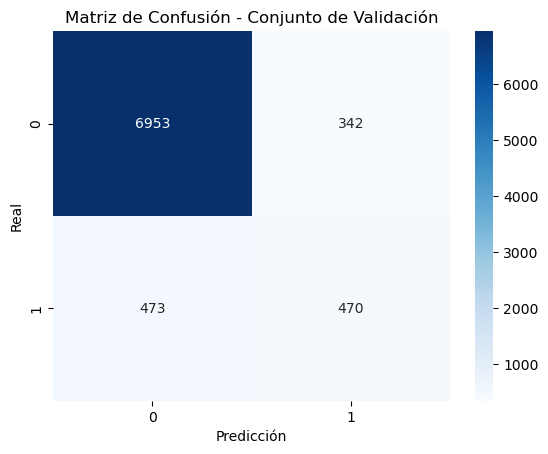

In [6]:
# Graficar la matriz de confusión
sns.heatmap(confusion_matrix_validation, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Conjunto de Validación")
plt.show()


# 6. Cálculo del mejor K
En esta etapa, calcularemos el mejor valor de K para el modelo KNN. Iteraremos sobre diferentes valores de K, evaluaremos el rendimiento del modelo en el conjunto de validación y elegiremos el valor de K que maximice la métrica de interés, como la exactitud.


In [15]:
# Definir una lista de valores de K a probar
k_values = [3, 5, 7, 9, 96, 97, 98, 99, 100, 101, 102]

# Inicializar variables para almacenar los resultados de cada valor de K
best_k = None
best_accuracy = 0

# Iterar sobre cada valor de K
for k in k_values:
    # Inicializar el clasificador KNN con el valor actual de K
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el clasificador KNN
    knn_classifier.fit(X_train_real, y_train_real)
    
    # Realizar predicciones sobre el conjunto de validación
    y_pred_validation = knn_classifier.predict(X_validation)
    
    # Calcular la exactitud
    accuracy = accuracy_score(y_validation, y_pred_validation)
    
    # Actualizar el mejor valor de K si encontramos una mejor exactitud
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Mostrar el mejor valor de K encontrado
print("Mejor valor de K:", best_k)
print("Exactitud correspondiente:", best_accuracy)


Mejor valor de K: 99
Exactitud correspondiente: 0.9081087642631707


# 7. Cálculo de predicciones
En esta etapa, utilizaremos el modelo KNN entrenado con el mejor valor de K encontrado para realizar predicciones sobre el conjunto de datos de prueba.

In [8]:
# Inicializar el clasificador KNN con el mejor valor de K encontrado
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Entrenar el clasificador KNN con el conjunto de entrenamiento completo
best_knn_classifier.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de datos de prueba
y_pred_test = best_knn_classifier.predict(X_test)

# Mostrar las predicciones
print("Predicciones sobre el conjunto de datos de prueba:")
print(y_pred_test)



NameError: name 'X_test' is not defined